In [1]:
import anndata
import numpy as np
import os
import scanpy as sc

In [2]:
pids = []
f=open('nonefiltered_version/pids.txt','r')
lines = f.readlines()
for l in lines:
    l=l.strip().split()[0]
    pids.append(l)
f.close()

In [3]:
alldata = anndata.read_h5ad('nonefiltered_version/scdata_t10_normed.h5ad')

In [4]:
alldata.X

<87239x17156 sparse matrix of type '<class 'numpy.float32'>'
	with 11806120 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd
adf1 = pd.read_excel('annotation1.xlsx')
adf2 = pd.read_excel('annotation2.xlsx')

In [9]:
selected_cells1 = np.array(adf1['Unnamed: 0'])
selected_cells2 = np.array(adf2['Unnamed: 0'])
types1 = np.array(adf1['Cluster'])
types2 = np.array(adf2['Cluster'])
selected_cells = np.concatenate([selected_cells1,selected_cells2],axis=0)
celltypes = np.concatenate([types1,types2],axis=0)

In [12]:
ppids = ['D0_rep1', 'D0_rep2', 'D0_rep3', 'D1_rep1', 'D1_rep2', 'D1_rep3',
       'D2_rep1', 'D2_rep2', 'D2_rep3', 'D3_rep1', 'D3_rep2', 'D3_rep3',
       'D4_rep1', 'D4_rep2', 'D4_rep3', 'DMSO_rep1', 'DMSO_rep2',
       'GW300_rep1', 'GW300_rep2', 'GW30_rep1', 'GW30_rep2', 'T100_rep1',
       'T100_rep2', 'T30_rep1', 'T30_rep2']

cpids = ['iMGL_D0_rep1_TPM', 'iMGL_D0_rep2_TPM', 'iMGL_D0_rep3_TPM',
       'iMGL_D1_rep1_TPM', 'iMGL_D1_rep2_TPM', 'iMGL_D1_rep3_TPM',
       'iMGL_D2_rep1_TPM', 'iMGL_D2_rep2_TPM', 'iMGL_D2_rep3_TPM',
       'iMGL_D3_rep1_TPM', 'iMGL_D3_rep2_TPM', 'iMGL_D3_rep3_TPM',
       'iMGL_D4_rep1_TPM', 'iMGL_D4_rep2_TPM', 'iMGL_D4_rep3_TPM',
       'iMGL_DMSO_rep1_TPM', 'iMGL_DMSO_rep2_TPM',
       'iMGL_GW3965_300nM_rep1_TPM', 'iMGL_GW3965_300nM_rep2_TPM',
       'iMGL_GW3965_30nM_rep1_TPM', 'iMGL_GW3965_30nM_rep2_TPM',
       'iMGL_T0901317_100nM_rep1_TPM', 'iMGL_T0901317_100nM_rep2_TPM',
       'iMGL_T0901317_30nM_rep1_TPM', 'iMGL_T0901317_30nM_rep2_TPM']

ppiddic = {}
piddic = {}

for i in range(len(ppids)):
    ppid = ppids[i]
    pid = cpids[i]
    piddic[pid] = ppid
    ppiddic[ppid] = pid

In [29]:
pidtypedics = {}
for i in range(len(pids)):
    pidtypedics[pids[i]] = {}
    

for j in range(len(selected_cells)):
    celltype = celltypes[j]
    sc = selected_cells[j]
    cid = sc.split('_')[-1]
    selected_ppid = (sc.replace(cid,''))[:-1]
    selected_pid = ppiddic[selected_ppid]
    pidtypedics[selected_pid][cid] = celltype

In [30]:
cellmask = []
alldatacelltypes=[]

for i in range(len(alldata.obs.index)):
    cellpid = alldata.obs['sample_id'][i]
    cellcid = alldata.obs.index[i]
    if cellcid in pidtypedics[cellpid].keys():
        cellmask.append(True)
        alldatacelltypes.append(pidtypedics[cellpid][cellcid])
    else:
        cellmask.append(False)

cellmask = np.array(cellmask)
alldatacelltypes = np.array(alldatacelltypes)

In [35]:
alldata = alldata[cellmask]
alldata.obs['celltype'] = alldatacelltypes

/tmp/ipykernel_2132840/3429110255.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  alldata.obs['celltype'] = alldatacelltypes


In [37]:
alldata.write('alldata_t10_normed_filtered_annotated.h5ad')

In [40]:
for i in range(len(pids)):
    pid = pids[i]
    adata = alldata[alldata.obs['sample_id'] == pid,:]
    print(adata.X.shape[0])
    adata.write('sample_sc/'+pid+'.h5ad')

1438
1471
1247
1942
2273
2399
1552
1674
1985
3222
2745
2500
2655
2377
2344
3374
4554
4361
4320
5176
2590
4248
8545
3176
2204


In [41]:
hvmask = np.load('hvmask.npy')

In [42]:
hvmask.shape

(17156,)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


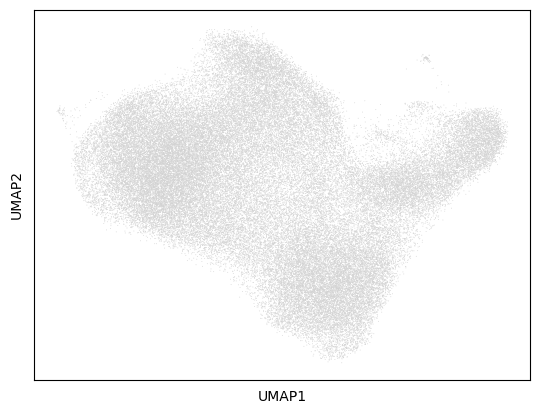

In [44]:
import scanpy as sc
gthvdata = alldata[:,hvmask]
sc.pp.log1p(gthvdata)
sc.pp.pca(gthvdata)
sc.pp.neighbors(gthvdata)
sc.tl.umap(gthvdata)
sc.pl.umap(gthvdata,save='gthvdata.png')


/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


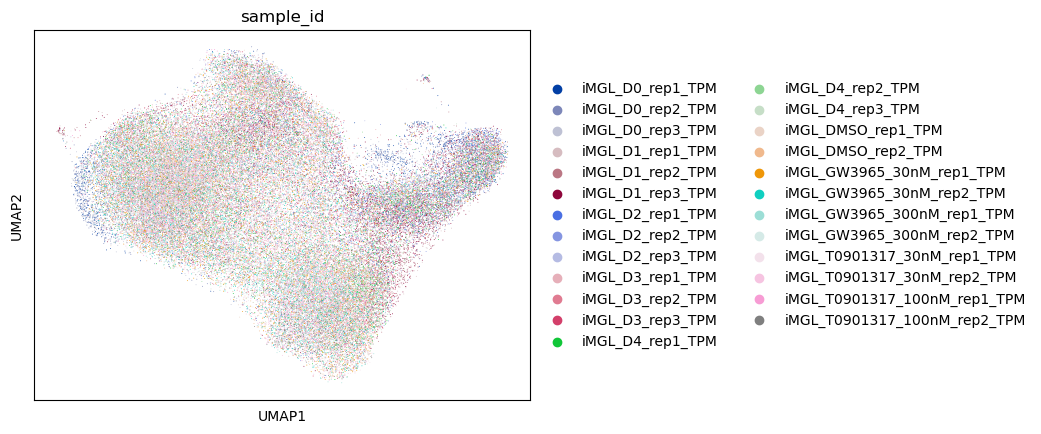

In [45]:
sc.pl.umap(gthvdata,color='sample_id',save='gthvdata_sampleid.png')

In [46]:
allcelltype = np.array(alldatacelltypes)
allcelltype = allcelltype.astype('str')

In [48]:
gthvdata.obs['celltype'] = allcelltype

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


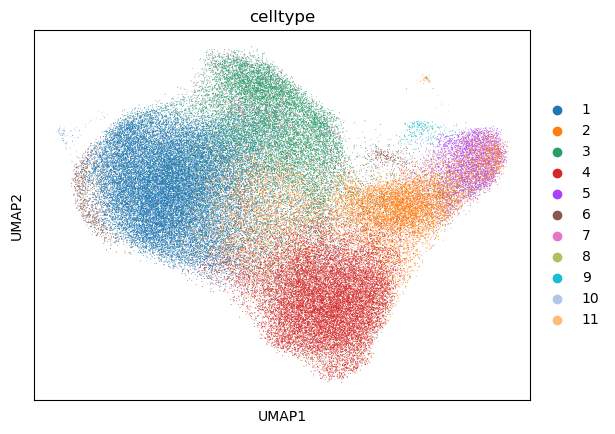

In [49]:
sc.pl.umap(gthvdata,color='celltype',save='gthvdata_celltype.png')

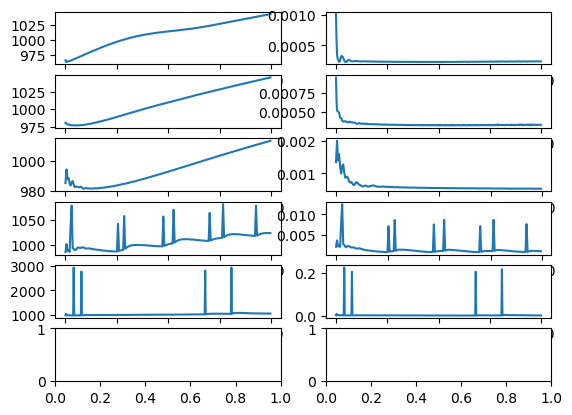

In [57]:
fname = os.listdir('training_hist/')[21]
import matplotlib.pyplot as plt
hists = np.load('training_hist/'+fname,allow_pickle=True)
histdic = hists.item()
fig, axs = plt.subplots(6,2)
axs[0][0].plot(histdic['total0'])
axs[0][1].plot(histdic['bulk0'])
axs[1][0].plot(histdic['total1'])
axs[1][1].plot(histdic['bulk1'])
axs[2][0].plot(histdic['total2'])
axs[2][1].plot(histdic['bulk2'])
axs[3][0].plot(histdic['total3'])
axs[3][1].plot(histdic['bulk3'])
axs[4][0].plot(histdic['total4'])
axs[4][1].plot(histdic['bulk4'])